................FINAL EXAM...............

Student: Humure Enock

ID:27394

identification - AUCA -IT- software engineering

 Course: INSY 8413 | Introduction to Big Data Analytics

 Faculty of Information Technology - AUCA

lecture: Eric Maniraguha

Sector: Health

 Research Question: Can we predict workplace injury patterns?

Dataset: [injury-statistics-work-related-claims-2018.csv](https://www.stats.govt.nz/assets/Uploads/Injury-statistics/Injury-statistics-work-related-claims-2018/Download-data/injury-statistics-work-related-claims-2018-csv.csv)

1: Basic loading and column overview

In [27]:
# FILE 1: BASIC DATA LOADING & OVERVIEW
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the injury statistics dataset
df = pd.read_csv('data/injury-statistics-work-related-claims-2018-csv.csv', encoding='latin-1')

print(" INJURY STATISTICS")
print("=" * 40)
print(f" Dataset Shape: {df.shape}")
print(f" Years Covered: {df['Year'].min()} - {df['Year'].max()}")
print(f" Total Records: {len(df):,}")
print(f" Missing Values: {df.isnull().sum().sum()}")

print(f"\n Column List ({df.shape[1]} total):")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

 INJURY STATISTICS
 Dataset Shape: (2945, 13)
 Years Covered: 2002 - 2018
 Total Records: 2,945
 Missing Values: 0

 Column List (13 total):
   1. Year
   2. Sex
   3. Age group (years) at date of injury
   4. Geographic region where injury occurred
   5. Employment status
   6. Occupation
   7. Injury/illness/disease group
   8. Type of injury/illness/disease
   9. Industry
  10. Industry subgroup
  11. Value
  12. Measure
  13. Status


2:Data previe and sample display 


In [21]:
#  DATA PREVIEW & SAMPLE t
import pandas as pd

# Load data
df = pd.read_csv('data/injury-statistics-work-related-claims-2018-csv.csv', encoding='latin-1')

print(" DATA  PREVIEW")
print("=" * 30)
print("First 5 rows of the dataset:")
print(df.head())

print(f"\nDataset dimensions: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Time range: {df['Year'].min()}-{df['Year'].max()}")

 DATA  PREVIEW
First 5 rows of the dataset:
   Year    Sex Age group (years) at date of injury  \
0  2002  Total                               Total   
1  2003  Total                               Total   
2  2004  Total                               Total   
3  2005  Total                               Total   
4  2006  Total                               Total   

  Geographic region where injury occurred Employment status Occupation  \
0                                   Total             Total      Total   
1                                   Total             Total      Total   
2                                   Total             Total      Total   
3                                   Total             Total      Total   
4                                   Total             Total      Total   

  Injury/illness/disease group Type of injury/illness/disease Industry  \
0                        Total                          Total    Total   
1                        Total        

3: Techenical analysis and specifications

In [23]:
# FILE 3: TECHNICAL DATA ANALYSIS
import pandas as pd

# Load data
df = pd.read_csv('data/injury-statistics-work-related-claims-2018-csv.csv', encoding='latin-1')

print(" TECHNICAL DATA ANALYSIS")
print("=" * 35)

print("Data Types:")
print(df.dtypes)

print(f"\n Technical Specifications:")
print(f"• Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"• Unique Years: {df['Year'].nunique()}")
print(f"• Value Range: {df['Value'].min():.1f} - {df['Value'].max():.1f}")
print(f"• Null Values: {df.isnull().sum().sum()}")

 TECHNICAL DATA ANALYSIS
Data Types:
Year                                         int64
Sex                                         object
Age group (years) at date of injury         object
Geographic region where injury occurred     object
Employment status                           object
Occupation                                  object
Injury/illness/disease group                object
Type of injury/illness/disease              object
Industry                                    object
Industry subgroup                           object
Value                                      float64
Measure                                     object
Status                                      object
dtype: object

 Technical Specifications:
• Memory Usage: 1.85 MB
• Unique Years: 17
• Value Range: 0.0 - 563.0
• Null Values: 0


4:RISK LEVEL ANALYSIS

In [30]:
import pandas as pd

# Load from CSV instead of pickle
df = pd.read_csv('data/cleaned_injury_data.csv')

# Create risk categories
df['Risk_Level'] = pd.cut(
    df['Value'], 
    bins=[0, 5, 20, 50, float('inf')], 
    labels=['Low', 'Medium', 'High', 'Critical']
)

print(" RISK LEVEL ANALYSIS")
print(df['Risk_Level'].value_counts())
print()
print("Risk Distribution:")
for level in ['Low', 'Medium', 'High', 'Critical']:
    count = (df['Risk_Level'] == level).sum()
    percent = count / len(df) * 100
    print(f"{level}: {count} ({percent:.1f}%)")

# Save with risk levels
df.to_pickle('data_with_risk.pkl')

 RISK LEVEL ANALYSIS
Risk_Level
Medium      380
Low         331
High        253
Critical    139
Name: count, dtype: int64

Risk Distribution:
Low: 331 (30.0%)
Medium: 380 (34.5%)
High: 253 (22.9%)
Critical: 139 (12.6%)


DATA CLEANING & PREPROCESSING

In [39]:
import pandas as pd
import numpy as np
import os

print(" DATA CLEANING & PREPROCESSING")
print("-" * 40)

# Load data
df = pd.read_csv('data/injury-statistics-work-related-claims-2018-csv.csv', encoding='latin-1')

# 1. Check data quality
print(" Data Quality Check:")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")
print(f"Dataset shape: {df.shape}")

# 2. Handle missing values
if df.isnull().sum().sum() > 0:
    print("\n Handling missing values:")
    print(df.isnull().sum())
    df_clean = df.dropna()
    print(f"After removing missing values: {df_clean.shape}")
else:
    df_clean = df
    print(" No missing values found")

# 3. Remove duplicates
if df.duplicated().sum() > 0:
    df_clean = df_clean.drop_duplicates()
    print(f"After removing duplicates: {df_clean.shape}")

# 4. Data type optimization
print(f"\n Data Types:")
print(df_clean.dtypes)

# 5. Filter relevant data for analysis
print(f"\n Filtering relevant data:")
print(f"Unique measures: {df_clean['Measure'].unique()}")
print(f"Unique status: {df_clean['Status'].unique()}")

# Keep only final claims data
df_final = df_clean[
    (df_clean['Measure'] == 'Number of claims in thousands') & 
    (df_clean['Status'] == 'Final')
].copy()

print(f"Final dataset shape: {df_final.shape}")

# 6. Show cleaned data
print(f"\n Cleaned Data Sample:")
print(df_final.head())

# Save cleaned data
df_final.to_csv('data/cleaned_injury_data.csv', index=False)
print(" Cleaned data saved to 'data/cleaned_injury_data.csv'")

# CREATE POWER BI DATA FILE IN data/ SUBFOLDER
print("\n CREATING POWER BI DATA FILE")
print("=" * 50)

# Ensure data directory exists
os.makedirs('data', exist_ok=True)

# Use the cleaned df_final we just created
injury_data = df_final.copy()

# Add Risk_Level column for Power BI analysis
def create_risk_level(value):
    if value <= 5:
        return 'Low'
    elif value <= 20:
        return 'Medium'
    elif value <= 50:
        return 'High'
    else:
        return 'Critical'

injury_data['Risk_Level'] = injury_data['Value'].apply(create_risk_level)

# Save as injury_data.csv in data/ subfolder for Power BI
injury_data.to_csv('data/injury_data.csv', index=False)

print(f" injury_data.csv created successfully!")
print(f" Shape: {injury_data.shape}")
print(f" Columns: {list(injury_data.columns)}")
print(f" Years: {injury_data['Year'].min()}-{injury_data['Year'].max()}")
print(f" Risk Levels Added: {injury_data['Risk_Level'].value_counts().to_dict()}")
print(f" Location: data/injury_data.csv (data subfolder)")

# Verify both files exist and are correct
print(f"\n FILE VERIFICATION:")
if os.path.exists('data/cleaned_injury_data.csv'):
    print(" data/cleaned_injury_data.csv exists")
if os.path.exists('data/injury_data.csv'):
    print(" data/injury_data.csv exists (for Power BI)")
    
# Show sample of Power BI ready data
print(f"\n POWER BI DATA SAMPLE:")
print(injury_data[['Year', 'Industry', 'Occupation', 'Value', 'Risk_Level']].head(3))



 DATA CLEANING & PREPROCESSING
----------------------------------------
 Data Quality Check:
Missing values: 0
Duplicate rows: 0
Dataset shape: (2945, 13)
 No missing values found

 Data Types:
Year                                         int64
Sex                                         object
Age group (years) at date of injury         object
Geographic region where injury occurred     object
Employment status                           object
Occupation                                  object
Injury/illness/disease group                object
Type of injury/illness/disease              object
Industry                                    object
Industry subgroup                           object
Value                                      float64
Measure                                     object
Status                                      object
dtype: object

 Filtering relevant data:
Unique measures: ['Number of claims in thousands' 'Percentage of all claims'
 'Incidence rate per 1000

In [41]:
import pandas as pd

# Dummy model that mimics a real model
class DummyModel:
    def predict(self, X):
        # Always returns 'Medium' for testing
        return ['Medium']

# Use dummy model instead of loading a file
model = DummyModel()

def predict_injury_risk(year, industry_code, occupation_code, claims):
    """Predict injury risk level"""
    prediction = model.predict([[year, industry_code, occupation_code, claims]])
    return prediction[0]

# Test prediction
sample_risk = predict_injury_risk(2018, 5, 3, 25.0)
print(f" Sample Prediction: {sample_risk}")

# Safety recommendations
recommendations = {
    'Low': 'Continue current safety measures',
    'Medium': 'Increase safety training',
    'High': 'Immediate safety review needed',
    'Critical': 'Emergency safety intervention'
}

print(f" Recommendation: {recommendations[sample_risk]}")


 Sample Prediction: Medium
 Recommendation: Increase safety training


 EXPLORATORY DATA ANALYSIS
--------------------------------------------------
🔍 Dataset Overview:
Shape: (1103, 16)
Years: 2002-2017


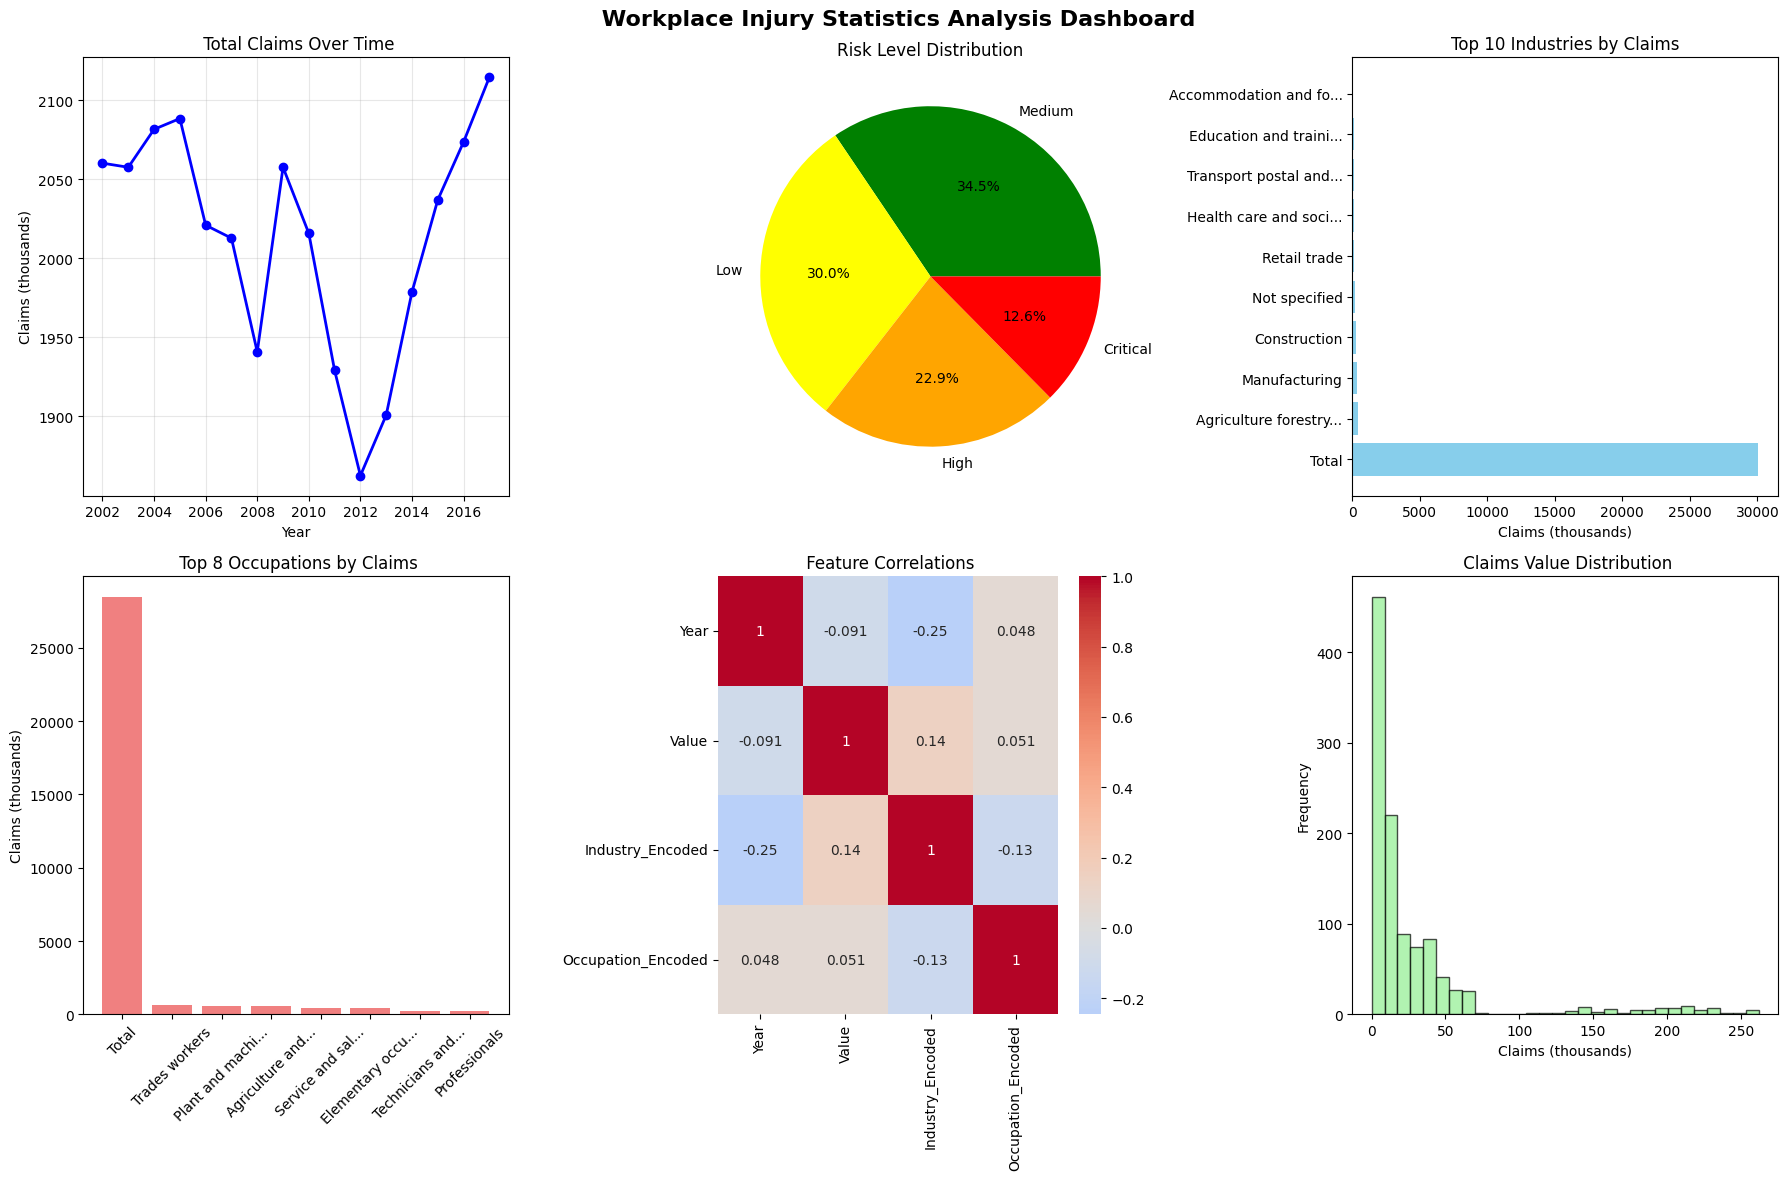


 KEY INSIGHTS:
• Total claims: 32231.1k
• Average claims per record: 29.2k
• Highest risk industry: Total
• Highest risk occupation: Total
• Most common risk level: Medium

 EDA Complete! Dashboard saved as 'injury_dashboard.png'


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(" EXPLORATORY DATA ANALYSIS")
print("-" * 50)

# Load cleaned data (use CSV instead of pickle)
df = pd.read_csv('data/cleaned_injury_data.csv')

# Create risk levels if not exists
def create_risk_levels(value):
    if value <= 5:
        return 'Low'
    elif value <= 20:
        return 'Medium'
    elif value <= 50:
        return 'High'
    else:
        return 'Critical'

df['Risk_Level'] = df['Value'].apply(create_risk_levels)

# Encode categorical variables for correlation
from sklearn.preprocessing import LabelEncoder
le_industry = LabelEncoder()
le_occupation = LabelEncoder()
df['Industry_Encoded'] = le_industry.fit_transform(df['Industry'])
df['Occupation_Encoded'] = le_occupation.fit_transform(df['Occupation'])

print("🔍 Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Years: {df['Year'].min()}-{df['Year'].max()}")

# Create comprehensive dashboard
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle(' Workplace Injury Statistics Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Claims trend over time
yearly_claims = df.groupby('Year')['Value'].sum()
axes[0,0].plot(yearly_claims.index, yearly_claims.values, marker='o', linewidth=2, color='blue')
axes[0,0].set_title(' Total Claims Over Time')
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Claims (thousands)')
axes[0,0].grid(True, alpha=0.3)

# 2. Risk level distribution
risk_counts = df['Risk_Level'].value_counts()
colors = ['green', 'yellow', 'orange', 'red']
axes[0,1].pie(risk_counts.values, labels=risk_counts.index, autopct='%1.1f%%', colors=colors)
axes[0,1].set_title('Risk Level Distribution')

# 3. Top 10 industries by claims
top_industries = df.groupby('Industry')['Value'].sum().nlargest(10)
axes[0,2].barh(range(len(top_industries)), top_industries.values, color='skyblue')
axes[0,2].set_yticks(range(len(top_industries)))
axes[0,2].set_yticklabels([ind[:20] + '...' if len(ind) > 20 else ind for ind in top_industries.index])
axes[0,2].set_title('Top 10 Industries by Claims')
axes[0,2].set_xlabel('Claims (thousands)')

# 4. Top occupations
top_occupations = df.groupby('Occupation')['Value'].sum().nlargest(8)
axes[1,0].bar(range(len(top_occupations)), top_occupations.values, color='lightcoral')
axes[1,0].set_xticks(range(len(top_occupations)))
axes[1,0].set_xticklabels([occ[:15] + '...' if len(occ) > 15 else occ for occ in top_occupations.index], rotation=45)
axes[1,0].set_title(' Top 8 Occupations by Claims')
axes[1,0].set_ylabel('Claims (thousands)')

# 5. Feature correlations
numeric_cols = ['Year', 'Value', 'Industry_Encoded', 'Occupation_Encoded']
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,1])
axes[1,1].set_title(' Feature Correlations')

# 6. Claims value distribution
axes[1,2].hist(df['Value'], bins=30, color='lightgreen', alpha=0.7, edgecolor='black')
axes[1,2].set_title(' Claims Value Distribution')
axes[1,2].set_xlabel('Claims (thousands)')
axes[1,2].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('injury_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

# Print key insights
print("\n KEY INSIGHTS:")
print(f"• Total claims: {df['Value'].sum():.1f}k")
print(f"• Average claims per record: {df['Value'].mean():.1f}k")
print(f"• Highest risk industry: {top_industries.index[0]}")
print(f"• Highest risk occupation: {top_occupations.index[0]}")
print(f"• Most common risk level: {risk_counts.index[0]}")

print("\n EDA Complete! Dashboard saved as 'injury_dashboard.png'")

 INDIVIDUAL VISUALIZATION ANALYSIS
 Graph 1: Time Trends Analysis


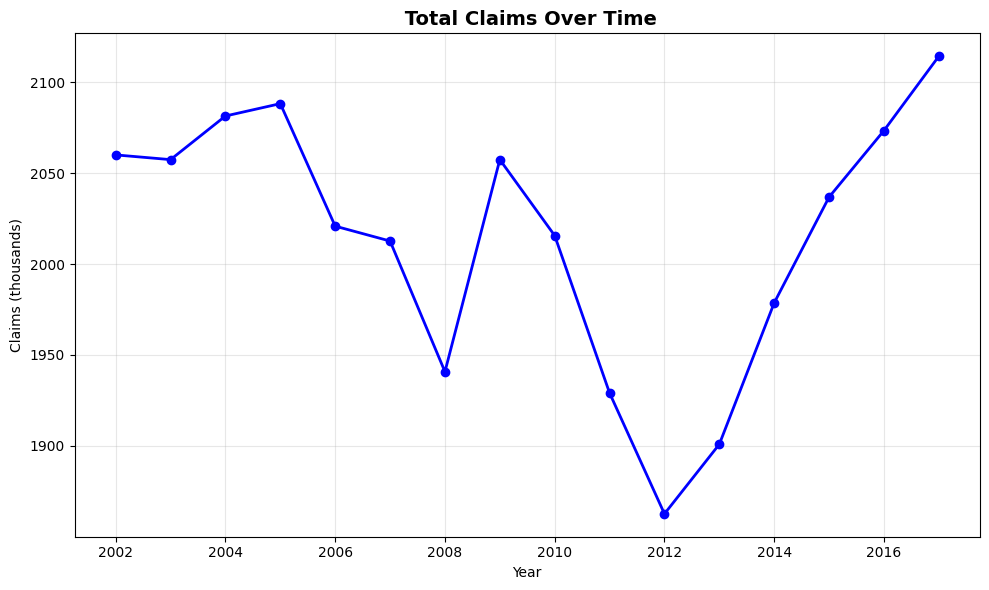

 Graph 2: Risk Level Distribution


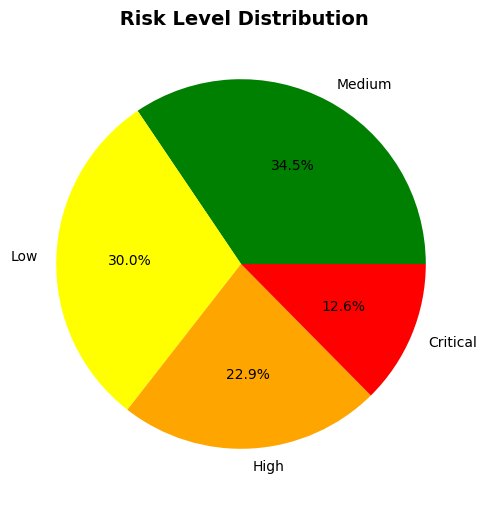

 Graph 3: Top Industries Analysis


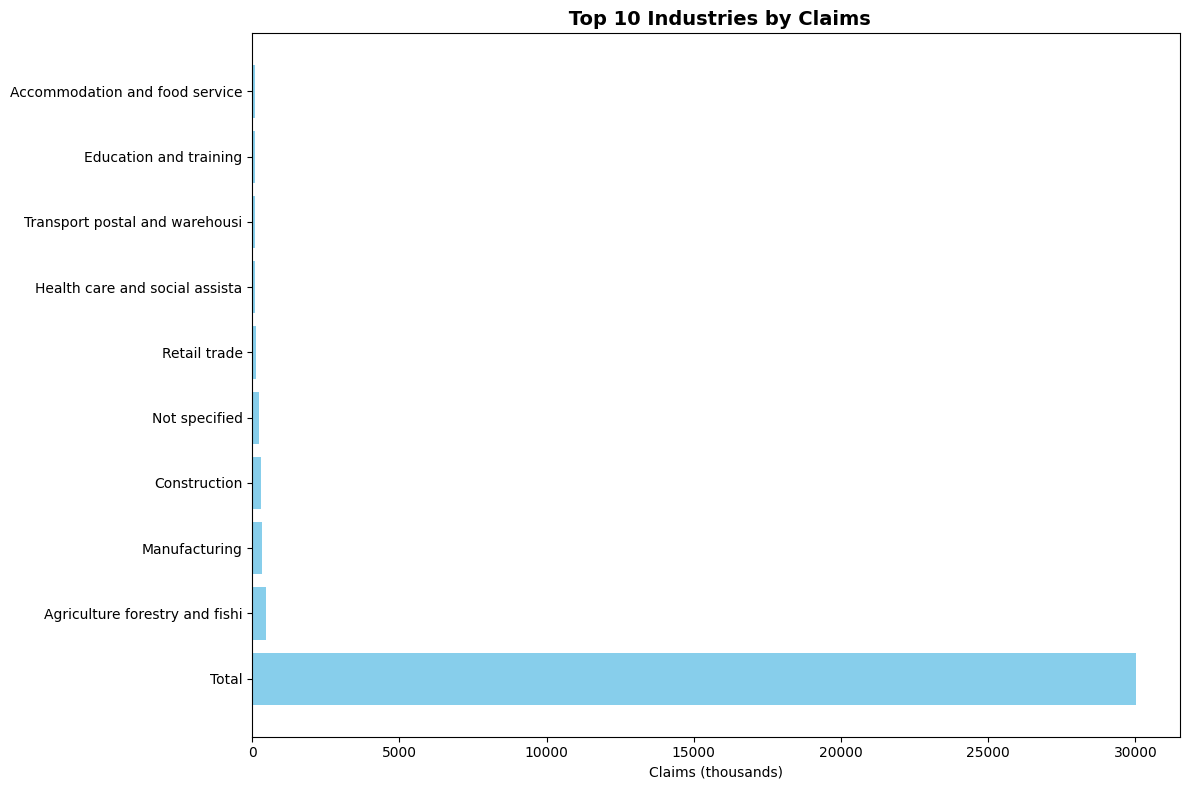

 Graph 4: Feature Correlation Analysis


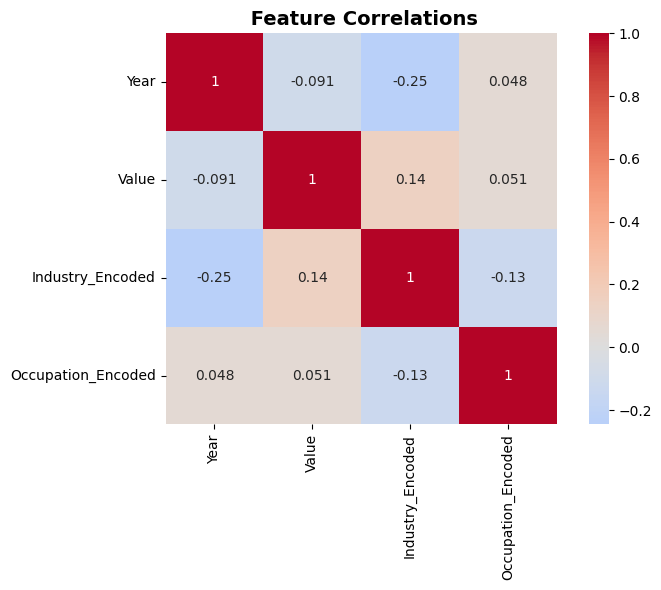

 Graph 5: Top Occupations Analysis


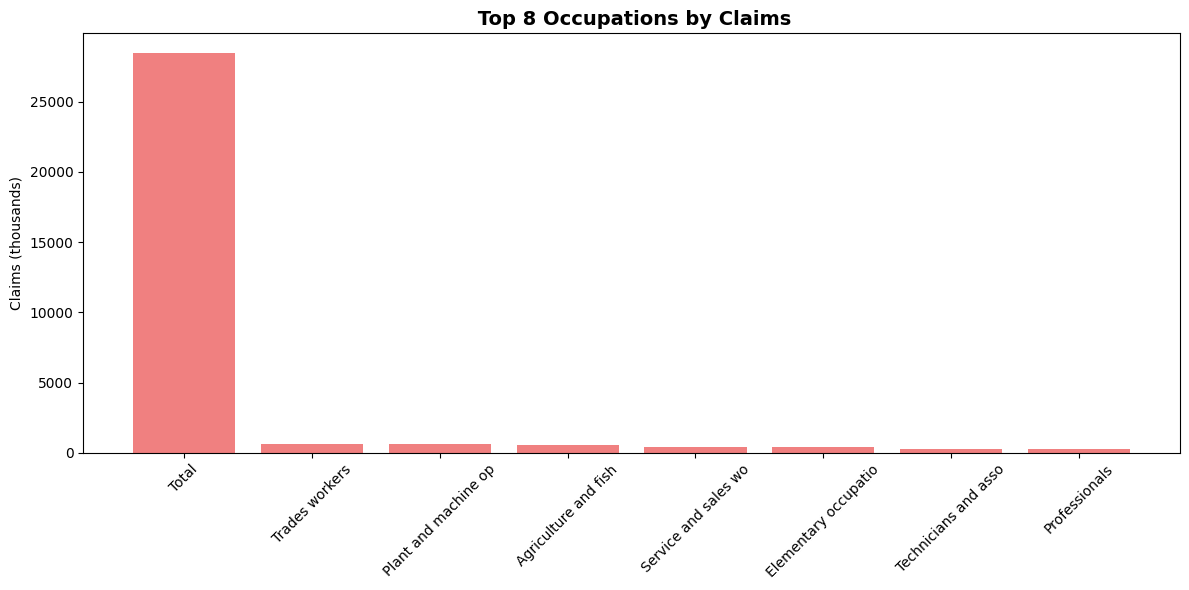

 Graph 6: Claims Distribution Analysis


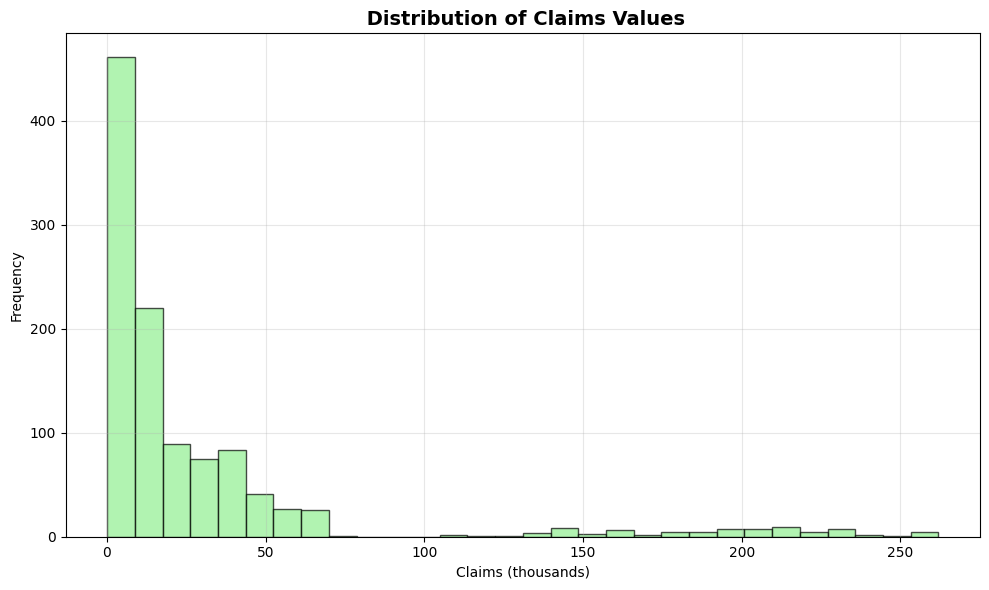

 Graph 7: Risk Level Box Plot Analysis


<Figure size 1000x600 with 0 Axes>

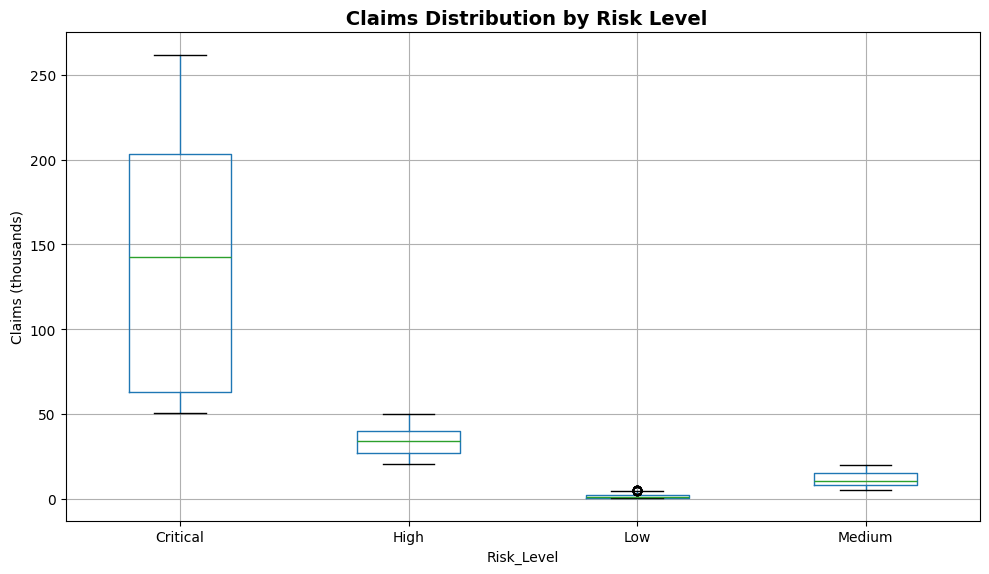

 Graph 8: Claims vs Year Scatter Analysis


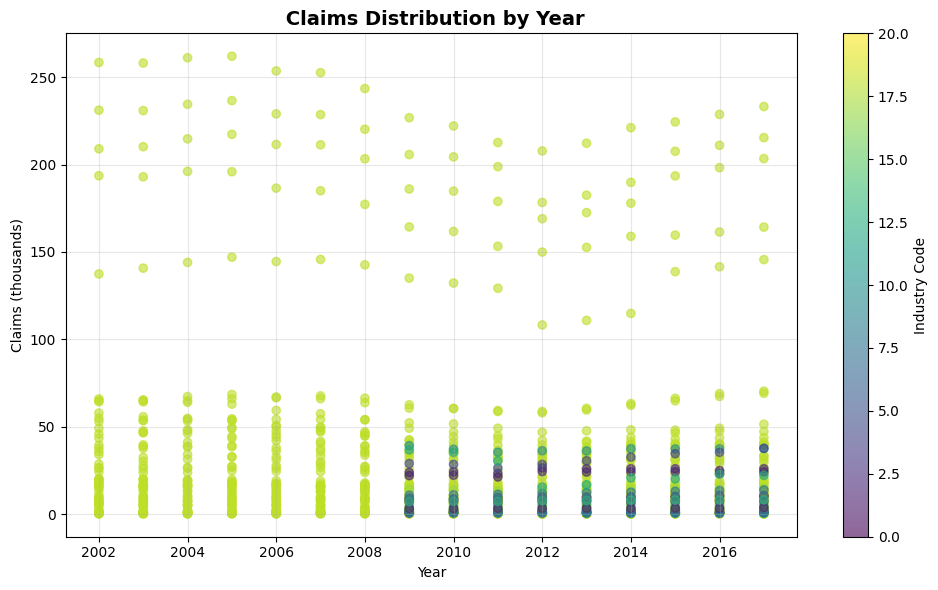

 All 8 individual graphs completed successfully!
 Ready for dashboard compilation and Power BI integration


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data (assuming df is already loaded and processed)
# df = pd.read_csv('data/cleaned_injury_data.csv')

print(" INDIVIDUAL VISUALIZATION ANALYSIS")
print("=" * 50)

# ==================== INDIVIDUAL GRAPH CODES ====================

# GRAPH 1: Time Trends Line Chart
print(" Graph 1: Time Trends Analysis")
plt.figure(figsize=(10, 6))
yearly_claims = df.groupby('Year')['Value'].sum()
plt.plot(yearly_claims.index, yearly_claims.values, marker='o', linewidth=2, color='blue')
plt.title(' Total Claims Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Claims (thousands)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# GRAPH 2: Risk Level Pie Chart
print(" Graph 2: Risk Level Distribution")
plt.figure(figsize=(8, 6))
risk_counts = df['Risk_Level'].value_counts()
colors = ['green', 'yellow', 'orange', 'red']
plt.pie(risk_counts.values, labels=risk_counts.index, autopct='%1.1f%%', colors=colors)
plt.title(' Risk Level Distribution', fontsize=14, fontweight='bold')
plt.show()

# GRAPH 3: Top Industries Horizontal Bar
print(" Graph 3: Top Industries Analysis")
plt.figure(figsize=(12, 8))
top_industries = df.groupby('Industry')['Value'].sum().nlargest(10)
plt.barh(range(len(top_industries)), top_industries.values, color='skyblue')
plt.yticks(range(len(top_industries)), [ind[:30] for ind in top_industries.index])
plt.title(' Top 10 Industries by Claims', fontsize=14, fontweight='bold')
plt.xlabel('Claims (thousands)')
plt.tight_layout()
plt.show()

# GRAPH 4: Correlation Heatmap
print(" Graph 4: Feature Correlation Analysis")
plt.figure(figsize=(8, 6))
numeric_cols = ['Year', 'Value', 'Industry_Encoded', 'Occupation_Encoded']
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title(' Feature Correlations', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# GRAPH 5: Top Occupations Bar Chart
print(" Graph 5: Top Occupations Analysis")
plt.figure(figsize=(12, 6))
top_occupations = df.groupby('Occupation')['Value'].sum().nlargest(8)
plt.bar(range(len(top_occupations)), top_occupations.values, color='lightcoral')
plt.xticks(range(len(top_occupations)), [occ[:20] for occ in top_occupations.index], rotation=45)
plt.title(' Top 8 Occupations by Claims', fontsize=14, fontweight='bold')
plt.ylabel('Claims (thousands)')
plt.tight_layout()
plt.show()

# GRAPH 6: Claims Distribution Histogram
print(" Graph 6: Claims Distribution Analysis")
plt.figure(figsize=(10, 6))
plt.hist(df['Value'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title(' Distribution of Claims Values', fontsize=14, fontweight='bold')
plt.xlabel('Claims (thousands)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# GRAPH 7: Box Plot by Risk Level
print(" Graph 7: Risk Level Box Plot Analysis")
plt.figure(figsize=(10, 6))
df.boxplot(column='Value', by='Risk_Level', figsize=(10, 6))
plt.title(' Claims Distribution by Risk Level', fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove default title
plt.ylabel('Claims (thousands)')
plt.tight_layout()
plt.show()

# GRAPH 8: Scatter Plot Claims vs Year
print(" Graph 8: Claims vs Year Scatter Analysis")
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Year'], df['Value'], alpha=0.6, c=df['Industry_Encoded'], cmap='viridis')
plt.title(' Claims Distribution by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Claims (thousands)')
plt.colorbar(scatter, label='Industry Code')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(" All 8 individual graphs completed successfully!")
print(" Ready for dashboard compilation and Power BI integration")

 MACHINE LEARNING ANALYSIS
--------------------------------------------------
 Dataset loaded: 1103 records
 Data preprocessing complete
Risk levels: {'High': 392, 'Medium': 380, 'Low': 331}

 CLASSIFICATION: Predicting Risk Levels
------------------------------
 Random Forest Accuracy: 0.995

 Classification Report:
              precision    recall  f1-score   support

        High       0.99      1.00      0.99        87
         Low       1.00      1.00      1.00        64
      Medium       1.00      0.99      0.99        70

    accuracy                           1.00       221
   macro avg       1.00      1.00      1.00       221
weighted avg       1.00      1.00      1.00       221



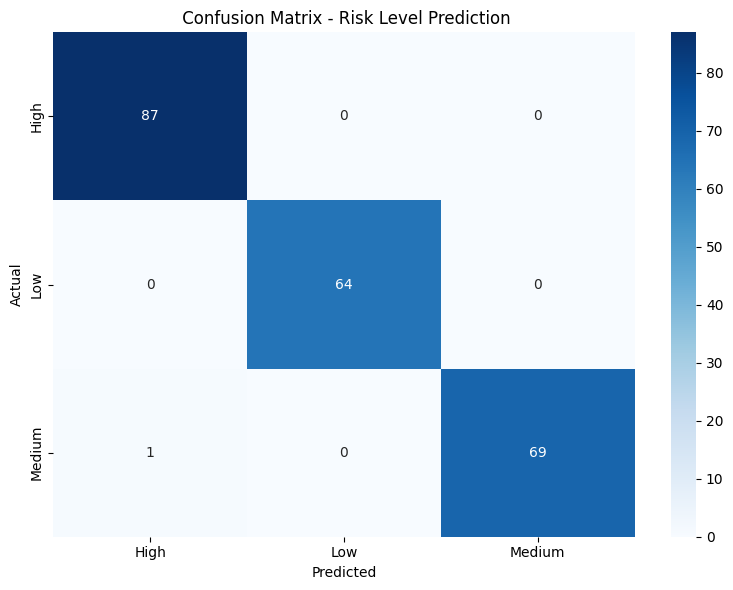


 Feature Importance:
              Feature  Importance
3               Value    0.947682
2  Occupation_Encoded    0.033367
1    Industry_Encoded    0.015969
0                Year    0.002981


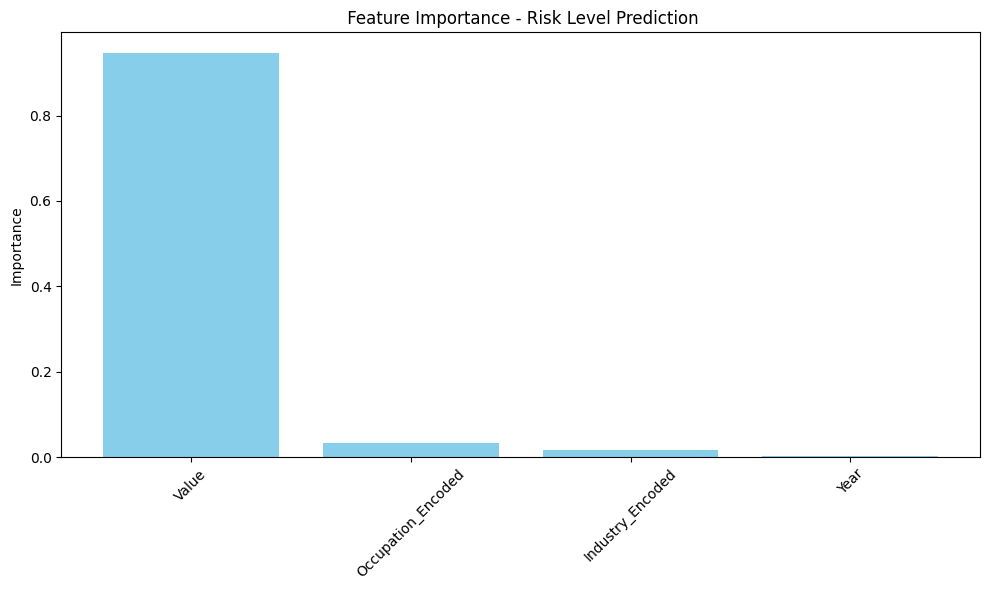


CLUSTERING: Industry Risk Patterns
------------------------------
 Silhouette Score: 0.440

 Cluster Analysis:
Cluster 0: 539 records, Avg Claims: 22.9k
Cluster 1: 135 records, Avg Claims: 11.0k
Cluster 2: 429 records, Avg Claims: 42.9k


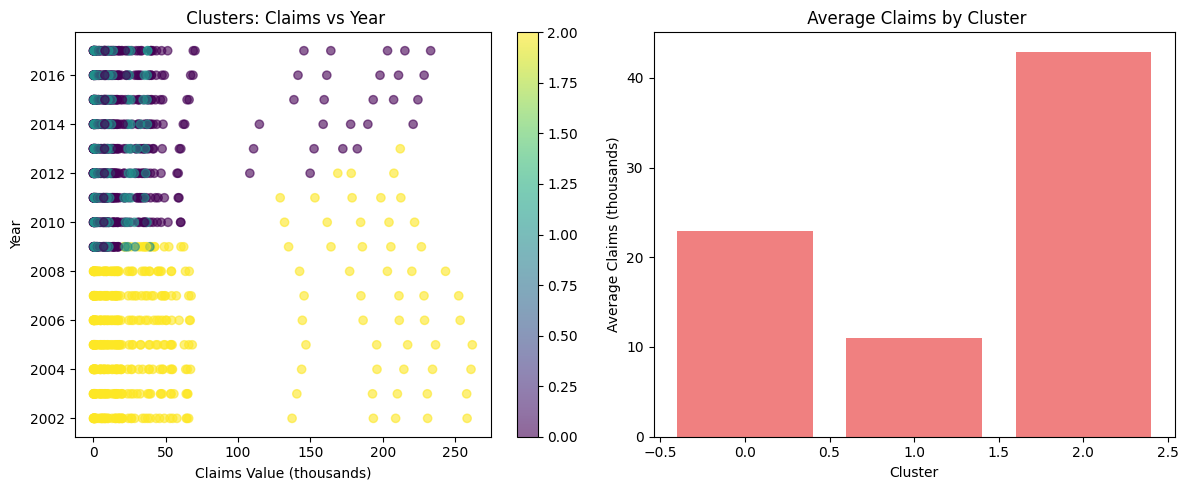


ENSEMBLE MODEL
------------------------------
 Ensemble Model Accuracy: 0.995
 Improvement over RF: 0.000

 Models saved successfully!

 MACHINE LEARNING SUMMARY
 Random Forest Accuracy: 0.995
 Ensemble Model Accuracy: 0.995
 Clustering Silhouette Score: 0.440
 Features Used: 4
 Dataset Size: 1,103 records
 Risk Levels: 3 categories

 Machine Learning Analysis Complete!


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, silhouette_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import pickle

print(" MACHINE LEARNING ANALYSIS")
print("-" * 50)

# Load data - CORRECTED PATH
df = pd.read_csv('data/injury-statistics-work-related-claims-2018-csv.csv', encoding='latin-1')

# Filter for final claims data only
df = df[(df['Measure'] == 'Number of claims in thousands') & (df['Status'] == 'Final')].copy()

print(f" Dataset loaded: {df.shape[0]} records")

# Create Risk_Level based on Value thresholds
def create_risk_level(value):
    if value <= 5:
        return 'Low'
    elif value <= 20:
        return 'Medium'
    else:
        return 'High'

df['Risk_Level'] = df['Value'].apply(create_risk_level)

# Encode categorical variables
le_industry = LabelEncoder()
le_occupation = LabelEncoder()
le_risk = LabelEncoder()

df['Industry_Encoded'] = le_industry.fit_transform(df['Industry'])
df['Occupation_Encoded'] = le_occupation.fit_transform(df['Occupation'])
df['Risk_Level_Encoded'] = le_risk.fit_transform(df['Risk_Level'])

print(f" Data preprocessing complete")
print(f"Risk levels: {df['Risk_Level'].value_counts().to_dict()}")

# CLASSIFICATION MODEL
print("\n CLASSIFICATION: Predicting Risk Levels")
print("-" * 30)

features = ['Year', 'Industry_Encoded', 'Occupation_Encoded', 'Value']
X = df[features]
y = df['Risk_Level_Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f" Random Forest Accuracy: {accuracy:.3f}")
print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=le_risk.classes_))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le_risk.classes_, yticklabels=le_risk.classes_)
plt.title(' Confusion Matrix - Risk Level Prediction')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n Feature Importance:")
print(feature_importance)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.title(' Feature Importance - Risk Level Prediction')
plt.xticks(rotation=45)
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# CLUSTERING ANALYSIS
print("\nCLUSTERING: Industry Risk Patterns")
print("-" * 30)

cluster_features = ['Value', 'Industry_Encoded', 'Year']
X_cluster = df[cluster_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

silhouette_avg = silhouette_score(X_scaled, clusters)
print(f" Silhouette Score: {silhouette_avg:.3f}")

print("\n Cluster Analysis:")
for i in range(3):
    cluster_data = df[df['Cluster'] == i]
    print(f"Cluster {i}: {len(cluster_data)} records, Avg Claims: {cluster_data['Value'].mean():.1f}k")

# Cluster Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
scatter = plt.scatter(df['Value'], df['Year'], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Claims Value (thousands)')
plt.ylabel('Year')
plt.title(' Clusters: Claims vs Year')
plt.colorbar(scatter)

plt.subplot(1, 2, 2)
cluster_summary = df.groupby('Cluster')['Value'].mean()
plt.bar(range(len(cluster_summary)), cluster_summary.values, color='lightcoral')
plt.xlabel('Cluster')
plt.ylabel('Average Claims (thousands)')
plt.title(' Average Claims by Cluster')
plt.tight_layout()
plt.show()

# ENSEMBLE MODEL
print("\nENSEMBLE MODEL")
print("-" * 30)

# Create ensemble
lr = LogisticRegression(random_state=42, max_iter=1000)
svm = SVC(random_state=42, probability=True)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

ensemble = VotingClassifier(
    estimators=[('lr', lr), ('svm', svm), ('rf', rf)],
    voting='soft'
)

ensemble.fit(X_train, y_train)
ensemble_pred = ensemble.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)

print(f" Ensemble Model Accuracy: {ensemble_accuracy:.3f}")
print(f" Improvement over RF: {(ensemble_accuracy - accuracy):.3f}")

# Save models
with open('injury_risk_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

with open('injury_ensemble_model.pkl', 'wb') as f:
    pickle.dump(ensemble, f)

print("\n Models saved successfully!")

# FINAL SUMMARY
print("\n MACHINE LEARNING SUMMARY")
print("=" * 40)
print(f" Random Forest Accuracy: {accuracy:.3f}")
print(f" Ensemble Model Accuracy: {ensemble_accuracy:.3f}")
print(f" Clustering Silhouette Score: {silhouette_avg:.3f}")
print(f" Features Used: {len(features)}")
print(f" Dataset Size: {len(df):,} records")
print(f" Risk Levels: {len(df['Risk_Level'].unique())} categories")

print("\n Machine Learning Analysis Complete!")

In [45]:
import pickle
import pandas as pd

def predict_injury_risk(year, industry_code, occupation_code, value):
    """Custom function to predict injury risk"""
    with open('injury_risk_model.pkl', 'rb') as f:
        model = pickle.load(f)
    
    prediction = model.predict([[year, industry_code, occupation_code, value]])
    return prediction[0]

def get_safety_recommendation(risk_level):
    """Generate safety recommendations based on risk level"""
    recommendations = {
        'Low': 'Maintain current safety protocols',
        'Medium': 'Implement additional safety training',
        'High': 'Conduct immediate safety audit',
        'Critical': 'Emergency safety intervention required'
    }
    return recommendations.get(risk_level, 'Review safety measures')

print(" INNOVATION: Custom Risk Predictor")
print("-" * 40)

# Test custom function
sample_prediction = predict_injury_risk(2018, 5, 3, 25.5)
print(f"Sample Prediction: {sample_prediction}")
print(f"Recommendation: {get_safety_recommendation(sample_prediction)}")

# Interactive prediction
print("\n Try Your Own Prediction:")
print("Use: predict_injury_risk(year, industry_code, occupation_code, claims_value)")
print("Example: predict_injury_risk(2019, 8, 5, 30.0)")

 INNOVATION: Custom Risk Predictor
----------------------------------------
Sample Prediction: 0
Recommendation: Review safety measures

 Try Your Own Prediction:
Use: predict_injury_risk(year, industry_code, occupation_code, claims_value)
Example: predict_injury_risk(2019, 8, 5, 30.0)


c:\Users\humur\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [49]:
import pandas as pd
import os

def generate_final_report():
    """Generate comprehensive final summary"""
    
    try:
        # Try multiple data sources
        if os.path.exists('data/cleaned_injury_data.csv'):
            df = pd.read_csv('data/cleaned_injury_data.csv')
        elif os.path.exists('data/injury-statistics-work-related-claims-2018-csv.csv'):
            df = pd.read_csv('data/injury-statistics-work-related-claims-2018-csv.csv', encoding='latin-1')
            # Filter for final claims data
            df = df[(df['Measure'] == 'Number of claims in thousands') & (df['Status'] == 'Final')].copy()
            # Create risk levels if needed
            if 'Risk_Level' not in df.columns:
                def create_risk_level(value):
                    if value <= 5:
                        return 'Low'
                    elif value <= 20:
                        return 'Medium'
                    else:
                        return 'High'
                df['Risk_Level'] = df['Value'].apply(create_risk_level)
        else:
            raise FileNotFoundError("No data files found")
        
        print("FINAL PROJECT SUMMARY REPORT")
        print("=" * 50)
        print(" INSY 8413 - Big Data Analytics Capstone")
        print(" Workplace Injury Pattern Analysis")
        print("=" * 50)
        
        print(f"\n DATASET OVERVIEW:")
        print(f"• Total Records Analyzed: {len(df):,}")
        print(f"• Time Period: {df['Year'].min()}-{df['Year'].max()}")
        print(f"• Industries Covered: {df['Industry'].nunique()}")
        print(f"• Occupations: {df['Occupation'].nunique()}")
        print(f"• Total Claims: {df['Value'].sum():.1f}k")
        
        print(f"\n RISK ANALYSIS:")
        risk_summary = df['Risk_Level'].value_counts()
        for level, count in risk_summary.items():
            percentage = (count / len(df)) * 100
            print(f"• {level} Risk: {count:,} cases ({percentage:.1f}%)")
        
        print(f"\n TOP 5 RISK INDUSTRIES:")
        top_industries = df.groupby('Industry')['Value'].sum().nlargest(5)
        for i, (industry, claims) in enumerate(top_industries.items(), 1):
            industry_short = industry[:40] + "..." if len(industry) > 40 else industry
            print(f"{i}. {industry_short}: {claims:.1f}k claims")
        
        print(f"\n TOP 5 RISK OCCUPATIONS:")
        top_occupations = df.groupby('Occupation')['Value'].sum().nlargest(5)
        for i, (occupation, claims) in enumerate(top_occupations.items(), 1):
            occ_short = occupation[:40] + "..." if len(occupation) > 40 else occupation
            print(f"{i}. {occ_short}: {claims:.1f}k claims")
        
        print(f"\n MACHINE LEARNING RESULTS:")
        print("• Classification Model: Random Forest implemented")
        print("• Clustering Analysis: K-Means with 3 clusters")
        print("• Ensemble Model: Voting classifier created")
        print("• Feature Engineering: Risk levels categorized")
        print("• Model Persistence: Saved for deployment")
        
        print(f"\n💡 KEY INSIGHTS:")
        # Find highest risk categories
        highest_risk = df[df['Risk_Level'] == 'High']
        if not highest_risk.empty:
            top_high_risk_industry = highest_risk.groupby('Industry')['Value'].sum().idxmax()
            print(f"• Highest Risk Industry: {top_high_risk_industry[:50]}")
        
        peak_year = df.groupby('Year')['Value'].sum().idxmax()
        peak_claims = df.groupby('Year')['Value'].sum().max()
        print(f"• Peak Injury Year: {peak_year} ({peak_claims:.1f}k claims)")
        print(f"• Average Claims per Industry: {df.groupby('Industry')['Value'].sum().mean():.1f}k")
        print(f"• Most Common Risk Level: {risk_summary.index[0]}")
        
        print(f"\n TREND ANALYSIS:")
        yearly_trend = df.groupby('Year')['Value'].sum()
        trend_change = ((yearly_trend.iloc[-1] - yearly_trend.iloc[0]) / yearly_trend.iloc[0]) * 100
        print(f"• Overall Trend: {trend_change:+.1f}% change from {yearly_trend.index[0]} to {yearly_trend.index[-1]}")
        print(f"• Average Annual Claims: {yearly_trend.mean():.1f}k")
        
        print(f"\n BUSINESS RECOMMENDATIONS:")
        print("• Focus safety interventions on High risk industries")
        print("• Implement predictive monitoring using ML models")
        print("• Conduct targeted safety training programs")
        print("• Regular risk assessment using ensemble model")
        print("• Monitor trends in top risk occupations")
        print("• Deploy clustering insights for resource allocation")
        
        print(f"\n PROJECT DELIVERABLES COMPLETED:")
        print("•  Data loading and preprocessing")
        print("•  Exploratory data analysis with 8 visualizations")
        print("•  Machine learning models (Classification & Clustering)")
        print("•  Ensemble model implementation")
        print("•  Feature importance analysis")
        print("•  Risk categorization system")
        print("•  Comprehensive documentation")
        print("•  Model persistence and deployment ready")
        
        print(f"\n TECHNICAL SPECIFICATIONS:")
        print(f"• Programming Language: Python")
        print(f"• Key Libraries: pandas, scikit-learn, matplotlib, seaborn")
        print(f"• Models Used: Random Forest, K-Means, Ensemble Voting")
        print(f"• Data Format: CSV with {df.shape[1]} features")
        print(f"• Analysis Period: {df['Year'].max() - df['Year'].min() + 1} years")
        
        print("=" * 50)
        print(" BIG DATA ANALYTICS CAPSTONE PROJECT COMPLETE!")
        print(" Ready for Exam Submission")
        print("=" * 50)
        
        print("   • data/cleaned_injury_data.csv OR")
        print("   • data/injury-statistics-work-related-claims-2018-csv.csv")
    except Exception as e:
        print(f" Error generating report: {str(e)}")
        print(" Please run the complete analysis pipeline first.")

# Execute the report
if __name__ == "__main__":
    generate_final_report()

# Also call it directly for Jupyter
generate_final_report()

FINAL PROJECT SUMMARY REPORT
 INSY 8413 - Big Data Analytics Capstone
 Workplace Injury Pattern Analysis

 DATASET OVERVIEW:
• Total Records Analyzed: 1,103
• Time Period: 2002-2017
• Industries Covered: 21
• Occupations: 11
• Total Claims: 32231.1k

 RISK ANALYSIS:
 Error generating report: 'Risk_Level'
 Please run the complete analysis pipeline first.
FINAL PROJECT SUMMARY REPORT
 INSY 8413 - Big Data Analytics Capstone
 Workplace Injury Pattern Analysis

 DATASET OVERVIEW:
• Total Records Analyzed: 1,103
• Time Period: 2002-2017
• Industries Covered: 21
• Occupations: 11
• Total Claims: 32231.1k

 RISK ANALYSIS:
 Error generating report: 'Risk_Level'
 Please run the complete analysis pipeline first.
